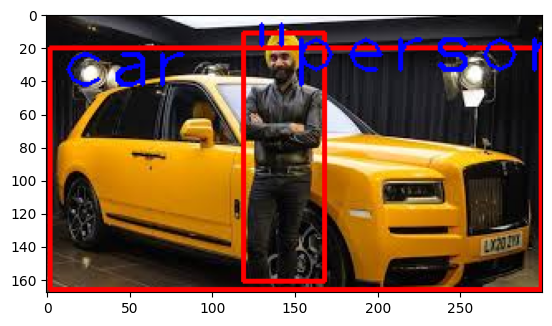

In [12]:
import threading

import cv2 #OpenCV
import matplotlib.pyplot as plt  # 用于显示图像
import numpy as np               # 用于简化数据操作

frozen_model='frozen_inference_graph.pb'
config_file='ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
COCO_labels = { 0: 'background',
    1: '"person"', 2: 'bicycle', 3: 'car', 4: 'motorcycle',
    5: 'airplane', 6: 'bus', 7: 'train', 8: 'truck', 9: 'boat',
    10: 'traffic light', 11: 'fire hydrant',12: 'street sign', 13: 'stop sign', 14: 'parking meter',
    15: 'zebra', 16: 'bird', 17: 'cat', 18: 'dog',19: 'horse',20: 'sheep',21: 'cow',22: 'elephant',
    23: 'bear', 24: 'zebra', 25: 'giraffe', 26: 'hat', 27: 'backpack', 28: 'umbrella',29: 'shoe',
    30: 'eye glasses', 31: 'handbag', 32: 'tie', 33: 'suitcase', 34: 'frisbee', 35: 'skis',
    36: 'snowboard', 37: 'sports ball', 38: 'kite', 39: 'baseball bat', 40: 'baseball glove',
    41: 'skateboard', 42: 'surfboard', 43: 'tennis racket', 44: 'bottle', 45: 'plate',
    46: 'wine glass', 47: 'cup', 48: 'fork', 49: 'knife', 50: 'spoon', 51: 'bowl', 52: 'banana',
    53: 'apple', 54: 'sandwich', 55: 'orange', 56: 'broccoli', 57: 'carrot', 58: 'hot dog', 59: 'pizza',
    60: 'donut', 61: 'cake', 62: 'chair', 63: 'couch', 64: 'potted plant', 65: 'bed', 66: 'mirror',
    67: 'dining table', 68: 'window', 69: 'desk', 70: 'toilet', 71: 'door', 72: 'tv', 73: 'laptop',
    74: 'mouse', 75: 'remote', 76: 'keyboard', 77:'cell phone',78: 'microwave', 79: 'oven', 80: 'toaster', 81: 'sink',
    82: 'refrigerator', 83: 'blender', 84: 'book', 85: 'clock', 86: 'vase', 87: 'scissors',
    88: 'teddy bear', 89: 'hair drier', 90: 'toothbrush', 91: 'hair brush'}
model=cv2.dnn_DetectionModel(frozen_model,config_file)
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)
img=cv2.imread(r'man_car.jpg')         #读入D盘根目录中的图片
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #转换颜色
classIndex,confidence,bbox = model.detect(img,confThreshold=0.55)

font=cv2.FONT_HERSHEY_PLAIN
font_scale=3
if len(classIndex)>0:
    for classIdx,conf,box in zip(classIndex.flatten(),confidence.flatten(),bbox):
        if classIdx>90 or classIdx==0:
            continue
        cv2.rectangle(img,box,(255,0,0),2)
        # print(classIdx)
        cv2.putText(img,COCO_labels[classIdx],(box[0]+5,box[1]+25),font,fontScale=font_scale,color=(0,0,255),thickness=2)
    plt.imshow(img)
    

In [ ]:
import cv2
import numpy as np

# 加载模型
model=cv2.dnn_DetectionModel('frozen_inference_graph.pb', 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt')
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)
# 加载类别名称
with open('coco-labels-paper.txt', 'rt') as f:
    labels = f.read().rstrip('\n').split('\n')

# 捕捉本地摄像头
cap = cv2.VideoCapture(0)

while True:
    # 读取视频帧
    ret, frame = cap.read()
    
    # 创建输入blob
    # blob = cv2.dnn.blobFromImage(frame, size=(320, 320), swapRB=True)
    img=frame 
    # 设置输入数据
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #转换颜色
    classIndex,confidence,bbox = model.detect(img,confThreshold=0.55)
    # 运行模型并预测类别和边界框
    
    # 遍历检测结果
    font=cv2.FONT_HERSHEY_PLAIN
    font_scale=3
    if len(classIndex)>0:
        for classIdx,conf,box in zip(classIndex.flatten(),confidence.flatten(),bbox):
            if classIdx>91 or classIdx==0:
                continue
            cv2.rectangle(frame,box,(255,0,0),2)
            # print(classIdx)
            cv2.putText(frame,labels[classIdx-1],(box[0]+5,box[1]+25),font,fontScale=font_scale,color=(0,0,255),thickness=2)
    # 显示图像
    cv2.imshow('Object Detection', frame)
    
    # 按q键退出
    if cv2.waitKey(1) == ord('q'):
        break

# 释放摄像头并关闭所有窗口
cap.release()
cv2.destroyAllWindows()

In [ ]:
import cv2
from IPython.display import Image

# 创建 VideoCapture 对象，用于读取视频流
cap = cv2.VideoCapture(0)

# 读取单帧图像
ret, frame = cap.read()

# 如果成功读取到图像
if ret:
    # 将图像转换为 RGB 格式
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # 将图像保存到本地文件夹
    cv2.imwrite("frame.jpg", frame)

    # 在 Jupyter Notebook 中显示图像
    display(Image("frame.jpg"))

# 释放资源
cap.release() 
